In [1]:
#include <TGraph.h>
#include <string>
#include <fstream>
#include <TH1D.h>
#include <TMath.h>
#include <TH2D.h>
#include <TCanvas.h>

void ruth()
{
  std::vector<double> theta = {};
  std::vector<double> cs  = {};
  std::vector<double> cs2  = {};
  double rad2deg = 180.0/M_PI;
  double E = 4.1;
  double E2 = 1.5;
  double z = 2.0;
  double Z = 13.0;
  double hbarc = 197.3;
  double alpha = 1.0/137.0;
  double e2 = hbarc*alpha;
  for(int i =1 ; i < 5000;++i){
    double q = i*(0.5*M_PI)/100;
    double c = TMath::Power((z*Z*e2/4.0/E),2.0)*1.0/TMath::Power(TMath::Sin(0.5*q),4);
    double c2 = TMath::Power((z*Z*e2/4.0/E2),2.0)*1.0/TMath::Power(TMath::Sin(0.5*q),4);
    theta.push_back(q*rad2deg);
    cs.push_back(c);    
    cs2.push_back(c2);
  }

  auto *gr = new TGraph(theta.size(), &theta[0], &cs[0]);
  auto *gr2 = new TGraph(theta.size(), &theta[0], &cs2[0]);

  auto *h2 = new TH2D("h2",";#theta [deg]; d#sigma/d#Omega [fm^{2}]",100,0,90,100,10.0,1.0e8);
  auto *can = new TCanvas("can","",600,600);
  can->SetLogy();
  h2->Draw();
  gr->SetLineColor(kMagenta);
  gr->SetLineWidth(2);
  gr->Draw("L");
  gr2->Draw("L");
  auto *leg = new TLegend(0.6, 0.68, 0.9, 0.85, "", "NDC");
  leg->AddEntry(gr, "E = 4.1 MeV","l");
  leg->AddEntry(gr2, "E = 1.5 MeV","l");
  leg->SetBorderSize(0);
  leg->Draw();
  can->Draw();
}

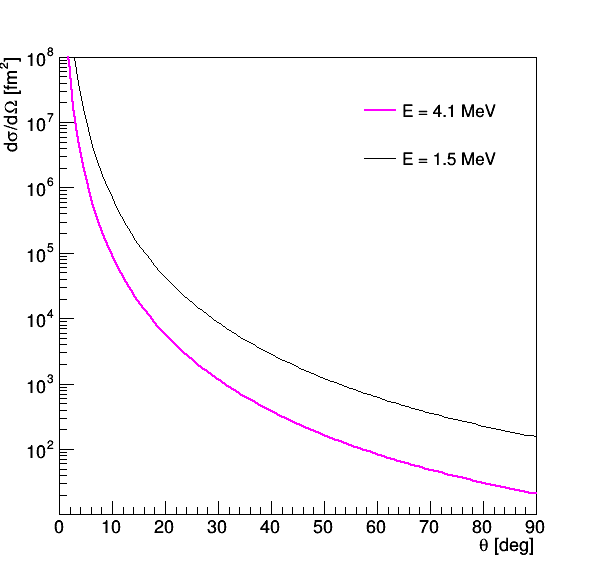

In [2]:
gStyle->SetOptStat(0);
ruth()